In [2]:
# Итоговая работа

import matplotlib.pyplot as plt
import numpy as np
import pylab
import sympy as sym
import scipy.stats as sts
import concurrent.futures
import scipy.optimize as spo

from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.misc import derivative
from sympy import diff
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
from scipy.optimize import basinhopping


%matplotlib inline

In [75]:
# Задание 1
# Дана матрица рейтингов фильмов (строки - пользователи (10 человек),
# столбцы - фильмы (15 фильмов))
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])


In [158]:
# a) Необходимо найти наиболее похожего пользователя по косинусной метрике 
# для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).
raitings_sparse = sparse.csr_matrix(raitings)
similarities = cosine_similarity(raitings_sparse)
print('косинусная метрика:\n {}\n'.format(similarities))


косинусная метрика:
 [[1.         0.82602919 0.84921529 0.78340116 0.81917632 0.74118548
  0.72735828 0.80967522 0.91065982 0.86010776]
 [0.82602919 1.         0.81234325 0.84635337 0.87138052 0.82713107
  0.82629684 0.80026003 0.82526308 0.81968127]
 [0.84921529 0.81234325 1.         0.84669374 0.78394299 0.79097985
  0.67616223 0.76289552 0.82112077 0.91873051]
 [0.78340116 0.84635337 0.84669374 1.         0.69153409 0.78665792
  0.83274211 0.82934667 0.7770666  0.8588687 ]
 [0.81917632 0.87138052 0.78394299 0.69153409 1.         0.7764434
  0.78200468 0.81236869 0.87948477 0.84574789]
 [0.74118548 0.82713107 0.79097985 0.78665792 0.7764434  1.
  0.74011801 0.84451685 0.80622876 0.85514908]
 [0.72735828 0.82629684 0.67616223 0.83274211 0.78200468 0.74011801
  1.         0.82669174 0.81130044 0.79154718]
 [0.80967522 0.80026003 0.76289552 0.82934667 0.81236869 0.84451685
  0.82669174 1.         0.7981276  0.83682229]
 [0.91065982 0.82526308 0.82112077 0.7770666  0.87948477 0.80622876


In [166]:
i=0
j=0
for i in range(len(similarities)):
    for j in range(len(similarities[i])):
        if (similarities[i,j])==(similarities[i,j-1]) and i!=j:
            i=i+1
            j=j+1
    print([i,j])
 #метрики пользователя из первой строки наиболее похожи на остальных пользователей с метриками певого столбца     

[0, 9]
[1, 9]
[2, 9]
[3, 9]
[4, 9]
[5, 9]
[6, 9]
[7, 9]
[8, 9]
[9, 9]


In [6]:
# b) Предположим, вы захотели сжать признаковые описания пользователя
# с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?


In [7]:
U, s, V = np.linalg.svd(raitings)
n_component = 5
S = np.diag(s)[:, :n_component]
V = V[:n_component, :5]
A = U.dot(S.dot(V))
print(A)

[[ 1.87714353  6.41126887  7.05045587  6.47383192  4.67524539]
 [ 8.47218818  2.54514441  5.55092788  9.47008358  6.66745215]
 [ 2.68479305  3.95864181  8.73709327  6.80481999  4.288088  ]
 [ 6.54449207  2.65799371  7.76817933  7.97515383  5.2821603 ]
 [ 4.29012286  5.45203499  3.41606541  4.86724143  6.55299609]
 [ 6.32112432  3.67971799  5.64141602  4.1373237   7.81175229]
 [ 8.41321307  4.8544321   4.99899382  7.1314049   7.75507973]
 [ 5.97648144  4.52884341  5.27968558  4.74766513  7.07966242]
 [ 2.72985484  8.28115267  6.57638375  5.34799457  6.92662199]
 [ 4.18209394  7.53862943 10.13627971  6.72606247  7.93915124]]


In [8]:
# Задание 2¶
# Вычислите производную $tg^2(sin(x) + cos(2x+3))$ 
# в точке $x_0=1$ (на python и на бумаге)
x =sym.Symbol('x')
f = sym.tan(sym.sin(x) + sym.cos(2*x+3))**2
derivative_f = f.diff(x)
derivative_f



2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [9]:
# значение производной функции в т.x=1
x=1
f1 = 2*(-2*np.sin(2*x+3) + np.cos(x))*(np.tan(np.sin(x)+np.cos(2*x+3))+1)*np.tan(np.sin(x) + np.cos(2*x+3))
print(f1)

31.833749268935282


In [10]:
# Задание 3
# Дана функция с неизвестными параметрами a и b,
# вам также известны значения функции fx в точках x. 
# Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [20]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [21]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

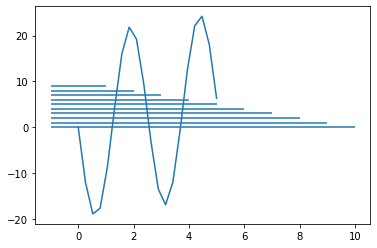

In [22]:
y = np.arange(10)
x_min = np.linspace(-1, 1, 1)
x_max = np.linspace(10, 1, 10)
fig, ax = plt.subplots()
plt.plot(x, fx)
ax.hlines(y, x_min, x_max)

plt.show()

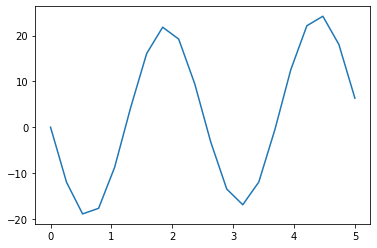

In [23]:
plt.plot(x, fx)
plt.show()

In [24]:
a=0
b=0
#print(f(x, a, b))

In [64]:
params=[0,0.03]

In [65]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))
print(error(params))

244.1162778621958


In [69]:
bounds=Bounds([-10, 10], [-10, 10]) 
res1=minimize(error, params, method='COBYLA',  bounds=bounds)
res1

     fun: 0.04237090352135198
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 45
  status: 1
 success: True
       x: array([ 3.00005346, -2.49994226])

In [92]:

res2 = minimize(error, params,  method='SLSQP',bounds=bounds)
res2
#print(res3.x)

     fun: 244.50954834808402
     jac: array([nan, nan])
 message: 'Inequality constraints incompatible'
    nfev: 3
     nit: 1
    njev: 1
  status: 4
 success: False
       x: array([-20.,  20.])

In [274]:
# подбор параметров a и b 
def guess_sin(a, b):
    return (np.e**a * np.sin(b*x) + x)
params, covariancve = spo.curve_fit(guess_sin, a, b)
err = np.sqrt(np.diag(covariancve))
print(params, err)

[1.18708078] [0.09320817]


In [233]:
#вспомогаетльная проверка
A=fx-(np.e**a * np.sin(b*x) +x)
A

array([  0.        , -12.28134881, -19.43600213, -18.47733939,
        -9.80554238,   2.9594557 ,  14.48906599,  19.97039687,
        17.11533529,   7.11569102,  -5.85430951, -16.38050172,
       -20.06885833, -15.37972097,  -4.27051141,   8.62136974,
        17.91436789,  19.72923718,  13.3083831 ,   1.33211092])

In [276]:
# Задание 4
# Создайте собственную дискретную случайную величину с 20 значениями. 
# Сгенерируйте 1000 выборок размера 50. 
# Посчитайте среднее для каждой выборки. 
# Постройте гистограмму распределения средних.


In [19]:
mu=2.0
sigma=0.5
# зададим нормально распределенную случайную величину
rv=sts.norm(loc=mu, scale=sigma)
# генерация 20 значений
sample=rv.rvs(size=20)
sample

array([1.55950194, 2.11850425, 0.58471176, 0.78044934, 2.59165124,
       1.97633819, 1.39016794, 2.27896049, 2.26014587, 1.99321258,
       1.9165274 , 1.42625068, 1.44530065, 2.47823231, 1.92934326,
       1.70946477, 1.46051252, 1.95244052, 2.20507478, 2.30692708])

In [20]:
# размер
n1 = 50
# количество выборок
samples_count = 1000
# Массивы для сохранения средних по выборкам
a1 = np.array([])

for number in range(samples_count):
    # На каждом цикле генерируются выборки разных размеров
    sample1 = rv.rvs(size=n1)
    # Считаем среднее по каждой выборке и добавляем в массив средних
    a1 = np.append(a1, sample1.mean())


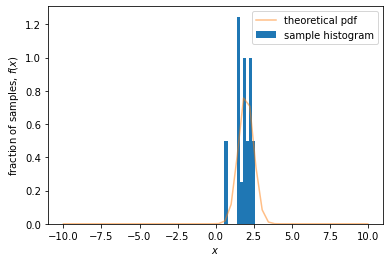

In [28]:
x = np.linspace(-10,10,50)
pdf = rv.pdf(x)
plt.hist(sample, density=True, bins=10, label='sample histogram')
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('fraction of samples, $f(x)$')
plt.xlabel('$x$')
plt.show()

In [37]:
# Задание 5
# Cобственные значения и собственные вектора матрицы
m = np.array([[1, 4], [1, 1]])
w, v = np.linalg.eig(m)
print(m)


[[1 4]
 [1 1]]


In [39]:
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 3.0000000000000004
соответствующий ему собственный вектор [0.89442719 0.4472136 ]
Собственное значение -0.9999999999999996
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
